Equation to be solved
$$
\dot{x} = v, \qquad \dot{v} = -x
$$

Explicit Euler method 
\\
The Explicit Euler (or Forward Euler) method updates the solution as follows
$$
y^{n+1} = y^n + \Delta t f(t_n,y_n)
$$


In [158]:
import numpy as np
# defining the problem
dt = 0.01
T = 100
N = int(T/dt)
x=np.zeros(N)
v=np.zeros(N)
t=np.linspace(0,T,N)
print(t)


[0.00000000e+00 1.00010001e-02 2.00020002e-02 ... 9.99799980e+01
 9.99899990e+01 1.00000000e+02]


In [159]:
#function to calculate next time step

def Explicit_Euler(x_n,v_n,dt):
    return x_n + dt*v_n, v_n - dt*x_n

In [160]:
#initial condition
x0,v0=1,0

x[0]=x0
v[0]=v0

for i in range(1,N,1):
    x[i],v[i] = Explicit_Euler(x[i-1],v[i-1],dt)
    
    
x_exact = list(map(lambda t:np.cos(t),t))
v_exact = list(map(lambda t:np.sin(t),t))
x_exact = np.array(x_exact)
v_exact = np.array(v_exact)

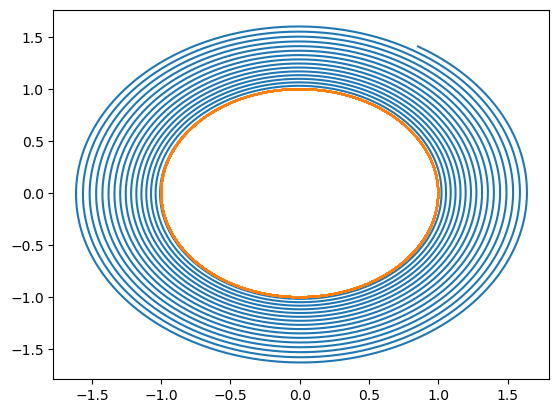

In [161]:
#ploting v vs x
import matplotlib.pyplot as plt

plt.plot(v,x)
plt.plot(v_exact,x_exact)
plt.show()

[0.5        0.50005    0.50010001 ... 1.35866532 1.35880119 1.35893707]


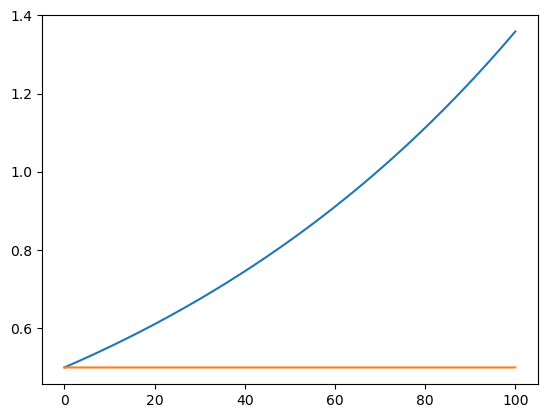

In [162]:
#plotting Energy vs t
E=0.5*(x**2+v**2)
E_exact = 0.5*(x_exact**2 + v_exact**2)
print(E)
plt.plot(t,E)
plt.plot(t,E_exact)
plt.show()

Exact solution for $x_0 = 1$ and $v_0 = 1$ is given by,
$$
    x = e^{it} = \cos{t} \qquad v = ie^{it} = -\sin{t}

$$

[0.00000000e+00 5.00095847e-05 1.00033337e-04 ... 5.40848888e-01
 5.44472129e-01 5.48041820e-01]


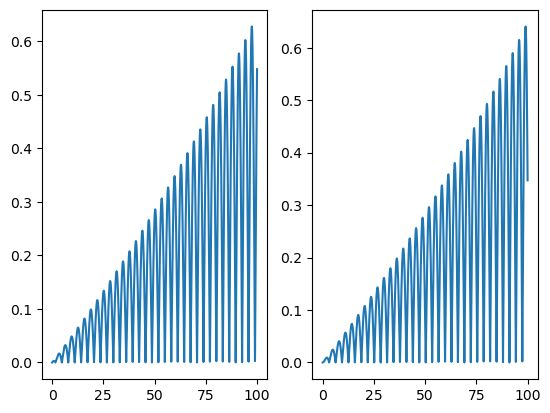

In [163]:
#error calculation
x_exact = list(map(lambda t:np.cos(t),t))
v_exact = list(map(lambda t:-np.sin(t),t))
#x_exact=np.array(x_exact)
#x=np.array(x)
#print(x_exact,x)
err_x = np.abs(x-x_exact)
err_v = np.abs(v-v_exact)


#ploting error
fig,(ax1,ax2) = plt.subplots(1,2)
#ax1.set_aspect("equal")
ax1.plot(t,err_x)
ax2.plot(t,err_v)
print(err_x)

Text(0.5, 0.98, 'Explicit Euler vs Exact Solution')

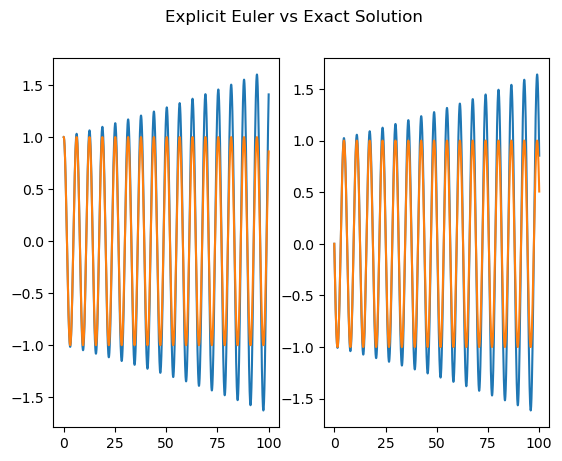

In [164]:
#ploting x and x_exact vs t
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,x)
ax1.plot(t,x_exact)
#ax1.plot(label = "Explicit Euler vs Exact Solution for x")
ax2.plot(t,v)
ax2.plot(t,v_exact)
#ax2.plot(label = "Explicit Euler vs Exact Solution for v")
fig.suptitle("Explicit Euler vs Exact Solution")

Implicit Euler or Backward Euler metod is given by,
$$
y_{n} = y_{n-1} + \Delta t*f(t_{n},y_{n}) \\
y_n - \Delta t*f(t_{n},y_{n}) = y_{n-1}
$$

For our example it turns out to be,
$$
x_{n} - \Delta t \times v_n = x_{n-1} \qquad v_n + \Delta t \times x_n = v_{n-1}
$$
So the matrix expression would be,
$$
\begin{pmatrix}
    1 & -dt \\
    dt & 1
\end{pmatrix}
\begin{pmatrix}
    x_n \\
    v_n
\end{pmatrix}
= \begin{pmatrix}
x_{n-1}\\
v_{n-1}
\end{pmatrix}
$$

In [169]:
x0,v0=1,0
dt=0.01
T =2*50*np.pi
n=int(T/dt)+1
x=np.zeros(n)
v= np.zeros(n)
times = np.linspace(0,T,n)
x[0],v[0]=x0,v0

A = np.array([
    [1, -dt],
    [dt, 1]
], dtype=float)

A1 = np.linalg.inv(A)

for tt in range(1,n):
    x[tt] = A1[0,0]*x[tt-1] + A1[0,1]*v[tt-1]
    v[tt] = A1[1,0]*x[tt-1] + A1[1,1]*v[tt-1]

E = 0.5*(x*x + v*v) 

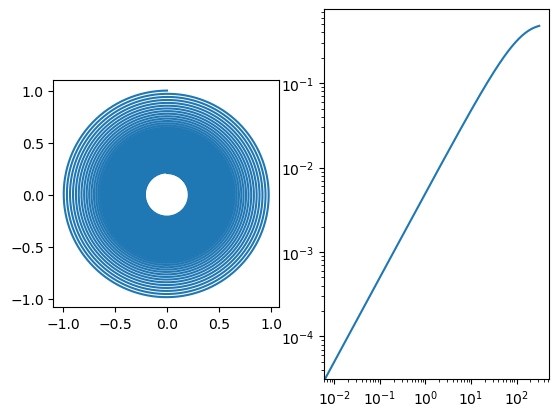

In [170]:
fig2,(ax3,ax4) = plt.subplots(1,2)
ax3.set_aspect("equal")
ax3.plot(v,x)

ax4.loglog(times,np.abs(E-E[0]))

Simplectic method - This method ensures time-reversibility and thus is better at conserving energy. 


In [165]:
x0,v0 = 1,0
dt =0.02
T =2*50*np.pi
n=int(T/dt)+1
x=np.zeros(n)
v= np.zeros(n)
times = np.linspace(0,T,n)
x[0],v[0]=x0,v0

for tt in range(1,n):
    v[tt] = v[tt-1] -x[tt-1]*dt
    x[tt] = x[tt-1] + v[tt]*dt
    
E = 0.5*(x*x + v*v) 

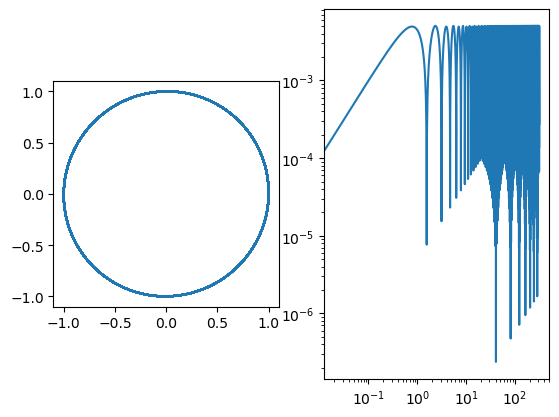

In [166]:
fig2,(ax3,ax4) = plt.subplots(1,2)
ax3.set_aspect("equal")
ax3.plot(v,x)

ax4.loglog(times,np.abs(E-E[0]))

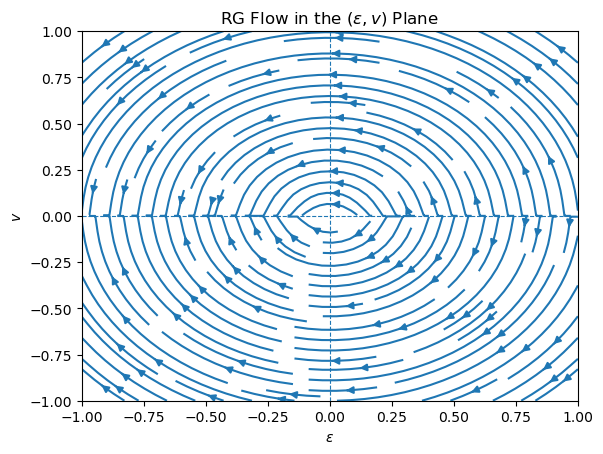

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the flow equations:
# dε/dτ = -v^2
# dv/dτ =  ε * v
def flow_epsilon(e, v):
    return -v**2

def flow_v(e, v):
    return e*v

# Create a grid of points over (epsilon, v)
N = 21
e_vals = np.linspace(-1.0, 1.0, N)
v_vals = np.linspace(-1.0, 1.0, N)
E, V = np.meshgrid(e_vals, v_vals)

# Compute the vector field at each point
dE = flow_epsilon(E, V)
dV = flow_v(E, V)

# Plot the streamlines
plt.figure()
plt.streamplot(E, V, dE, dV, density=1.2)

plt.axhline(0, linestyle='--', linewidth=0.8)  # dashed line for v=0
plt.axvline(0, linestyle='--', linewidth=0.8)  # dashed line for epsilon=0

plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$v$')
plt.title('RG Flow in the $(\epsilon,v)$ Plane')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.show()
